### Imports

In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas 

Using TensorFlow backend.


### Data Preparation

In [14]:
data = pandas.read_csv('./data/Learning/Training_set.csv')
test = pandas.read_csv('./data/Learning/Test_set.csv')

x_train_set = data[['x','y','z']]

target = data['brakingStatus']
# xtrain_set = [data[['x','y','z']][i:i+1].iterrows() for i in range(0,train_set)]
# target = [data['brakingStatus'][i:i+1] for i in range(0,train_set)]

x_test_set = test[['x','y','z']]
y_test_set = test['brakingStatus']


In [17]:
x_train_set = np.array(x_train_set,dtype=float)

target = np.array(target,dtype=float)

x_test_set =  np.array(x_test_set,dtype=float)
y_test_set =  np.array(y_test_set,dtype=float)

In [23]:
x_train_set_array= []      
for i in x_train_set:
    x_train_set_array.append([i])
x_train_set_array = np.array(x_train_set_array, dtype = float)

x_test_set_array= []      
for i in x_test_set:
    x_test_set_array.append([i])
x_test_set_array = np.array(x_test_set_array, dtype = float)

y_test_set_array= []      
for i in y_test_set:
    y_test_set_array.append([i])
y_test_set_array = np.array(y_test_set_array, dtype = float)

target_array= []      
for i in target:
    target_array.append([i])
target_array = np.array(target_array, dtype = float)




In [39]:
target_array.shape

(20675, 1)

In [41]:
x_test_set_array.shape

(41178, 1, 3)

### RNN model

In [25]:
model = Sequential()

In [26]:
model.add(LSTM(1,batch_input_shape= (None,1,3),return_sequences= False))

Instructions for updating:
Colocations handled automatically by placer.


In [27]:
model.compile(loss='mean_absolute_error',optimizer='adam',metrics=['accuracy'])

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1)                 20        
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [30]:
history = model.fit(x_train_set_array,target_array,epochs=100,validation_data=(x_test_set_array[11000:16000],y_test_set_array[11000:16000]))

Instructions for updating:
Use tf.cast instead.
Train on 20675 samples, validate on 5000 samples
Epoch 1/100
20675/20675 [==============================] - 6s 266us/step - loss: 0.0882 - acc: 0.9531 - val_loss: 0.0849 - val_acc: 0.9190
Epoch 2/100
20675/20675 [==============================] - 2s 82us/step - loss: 0.0470 - acc: 0.9533 - val_loss: 0.0811 - val_acc: 0.9190
Epoch 3/100
20675/20675 [==============================] - 2s 107us/step - loss: 0.0468 - acc: 0.9533 - val_loss: 0.0810 - val_acc: 0.9190
Epoch 4/100
20675/20675 [==============================] - 2s 93us/step - loss: 0.0468 - acc: 0.9533 - val_loss: 0.0810 - val_acc: 0.9190
Epoch 5/100
20675/20675 [==============================] - 2s 106us/step - loss: 0.0468 - acc: 0.9533 - val_loss: 0.0810 - val_acc: 0.9190
Epoch 6/100
20675/20675 [==============================] - 1s 70us/step - loss: 0.0468 - acc: 0.9533 - val_loss: 0.0810 - val_acc: 0.9190
Epoch 7/100
20675/20675 [==============================] - 2s 102us/step

20675/20675 [==============================] - 1s 67us/step - loss: 0.0410 - acc: 0.9618 - val_loss: 0.0831 - val_acc: 0.9170
Epoch 58/100
20675/20675 [==============================] - 2s 80us/step - loss: 0.0410 - acc: 0.9620 - val_loss: 0.0832 - val_acc: 0.9168
Epoch 59/100
20675/20675 [==============================] - 2s 79us/step - loss: 0.0410 - acc: 0.9620 - val_loss: 0.0831 - val_acc: 0.9168
Epoch 60/100
20675/20675 [==============================] - 2s 74us/step - loss: 0.0409 - acc: 0.9622 - val_loss: 0.0831 - val_acc: 0.9170
Epoch 61/100
20675/20675 [==============================] - 2s 75us/step - loss: 0.0409 - acc: 0.9620 - val_loss: 0.0831 - val_acc: 0.9170
Epoch 62/100
20675/20675 [==============================] - 2s 82us/step - loss: 0.0409 - acc: 0.9621 - val_loss: 0.0831 - val_acc: 0.9170
Epoch 63/100
20675/20675 [==============================] - 2s 78us/step - loss: 0.0409 - acc: 0.9621 - val_loss: 0.0831 - val_acc: 0.9170
Epoch 64/100
20675/20675 [==============

In [31]:
results = model.predict(x_test_set_array)

<function matplotlib.pyplot.show(*args, **kw)>

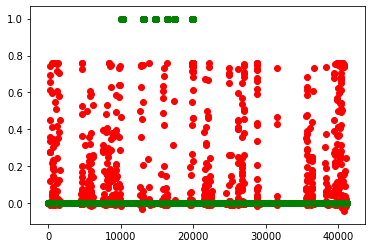

In [37]:
plt.scatter(range(41178),results,c='r')
plt.scatter(range(41178),y_test_set_array,c='g')
plt.show

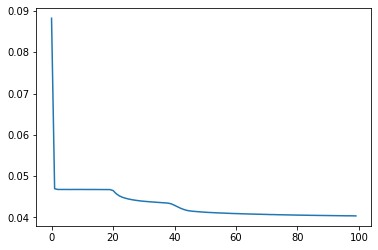

In [38]:
plt.plot(history.history['loss'])
plt.show()

### Training by just 'X' 

In [44]:
x_train_set_X = data['x']
x_test_set_X = test['x']


x_train_set_X = np.array(x_train_set_X,dtype= float)
x_test_set_X = np.array(x_test_set_X,dtype= float)


In [45]:
x_train_set_array_X= []      
for i in x_train_set:
    x_train_set_array_X.append([i])
x_train_set_array_X = np.array(x_train_set_array_X, dtype = float)

x_test_set_array_X= []      
for i in x_test_set:
    x_test_set_array_X.append([i])
x_test_set_array_X = np.array(x_test_set_array_X, dtype = float)

In [46]:
model_X = Sequential()

In [47]:
model_X.add(LSTM(1,batch_input_shape= (None,1,3),return_sequences= False))

In [49]:
model_X.compile(loss='mean_absolute_error',optimizer='adam',metrics=['accuracy'])

In [50]:
model_X.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 1)                 20        
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [65]:
history = model_X.fit(x_train_set_array_X,target_array,epochs=100,validation_data=(x_test_set_array_X[10000:20000],y_test_set_array[10000:20000]))

Train on 20675 samples, validate on 10000 samples
Epoch 1/300
20675/20675 [==============================] - 3s 158us/step - loss: 0.0938 - acc: 0.9517 - val_loss: 0.1144 - val_acc: 0.8937
Epoch 2/300
20675/20675 [==============================] - 2s 89us/step - loss: 0.0474 - acc: 0.9533 - val_loss: 0.1064 - val_acc: 0.8937
Epoch 3/300
20675/20675 [==============================] - 2s 78us/step - loss: 0.0468 - acc: 0.9533 - val_loss: 0.1063 - val_acc: 0.8937
Epoch 4/300
20675/20675 [==============================] - 2s 77us/step - loss: 0.0468 - acc: 0.9533 - val_loss: 0.1063 - val_acc: 0.8937
Epoch 5/300
20675/20675 [==============================] - 2s 78us/step - loss: 0.0468 - acc: 0.9533 - val_loss: 0.1063 - val_acc: 0.8937
Epoch 6/300
20675/20675 [==============================] - 2s 78us/step - loss: 0.0468 - acc: 0.9533 - val_loss: 0.1063 - val_acc: 0.8937
Epoch 7/300
20675/20675 [==============================] - 2s 78us/step - loss: 0.0468 - acc: 0.9533 - val_loss: 0.1064 -

20675/20675 [==============================] - 2s 98us/step - loss: 0.0467 - acc: 0.9533 - val_loss: 0.1063 - val_acc: 0.8937
Epoch 60/300
20675/20675 [==============================] - 2s 79us/step - loss: 0.0467 - acc: 0.9533 - val_loss: 0.1063 - val_acc: 0.8937
Epoch 61/300
20675/20675 [==============================] - 2s 81us/step - loss: 0.0467 - acc: 0.9533 - val_loss: 0.1063 - val_acc: 0.8937
Epoch 62/300
20675/20675 [==============================] - 2s 90us/step - loss: 0.0467 - acc: 0.9533 - val_loss: 0.1063 - val_acc: 0.8937
Epoch 63/300
20675/20675 [==============================] - 2s 88us/step - loss: 0.0467 - acc: 0.9533 - val_loss: 0.1063 - val_acc: 0.8937
Epoch 64/300
20675/20675 [==============================] - 2s 76us/step - loss: 0.0467 - acc: 0.9533 - val_loss: 0.1063 - val_acc: 0.8937
Epoch 65/300
20675/20675 [==============================] - 2s 80us/step - loss: 0.0467 - acc: 0.9533 - val_loss: 0.1063 - val_acc: 0.8937
Epoch 66/300
20675/20675 [==============

Epoch 118/300
20675/20675 [==============================] - 2s 80us/step - loss: 0.0467 - acc: 0.9533 - val_loss: 0.1063 - val_acc: 0.8937
Epoch 119/300
20675/20675 [==============================] - 2s 78us/step - loss: 0.0467 - acc: 0.9533 - val_loss: 0.1063 - val_acc: 0.8937
Epoch 120/300
20675/20675 [==============================] - 2s 86us/step - loss: 0.0467 - acc: 0.9533 - val_loss: 0.1063 - val_acc: 0.8937
Epoch 121/300
20675/20675 [==============================] - 2s 90us/step - loss: 0.0467 - acc: 0.9533 - val_loss: 0.1063 - val_acc: 0.8937
Epoch 122/300
20675/20675 [==============================] - 2s 81us/step - loss: 0.0467 - acc: 0.9533 - val_loss: 0.1063 - val_acc: 0.8937
Epoch 123/300
20675/20675 [==============================] - 2s 74us/step - loss: 0.0467 - acc: 0.9533 - val_loss: 0.1063 - val_acc: 0.8937
Epoch 124/300
20675/20675 [==============================] - 2s 73us/step - loss: 0.0467 - acc: 0.9533 - val_loss: 0.1063 - val_acc: 0.8937
Epoch 125/300
20675/

KeyboardInterrupt: 

In [66]:
results_X = model_X.predict(x_test_set_array_X)

<function matplotlib.pyplot.show(*args, **kw)>

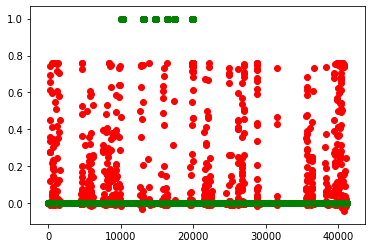

In [67]:
plt.scatter(range(41178),results,c='r')
plt.scatter(range(41178),y_test_set_array,c='g')
plt.show

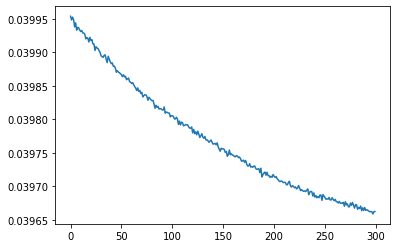

In [68]:
plt.plot(history.history['loss'])
plt.show()

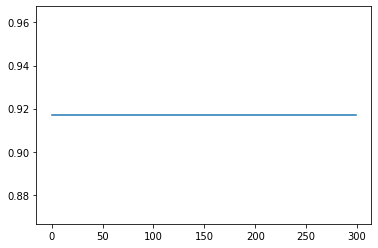

In [63]:
plt.plot(history.history['val_acc'])
plt.show()